# PreProcessing: Feature Selection

Feature Selection is an important step in data pre-processing. It consists in selecting the best subset of input variable as the most pertinent. Discarding irrelevant data is essential before applying Machine Learning algorithm in order to:
* *Reduce Overfitting*: less opportunity to make decisions based on noise;
* *Improve Accuracy*: less misleading data means modelling accuracy improves. Predictions can be greatly distorted by redundant attributes. 
* *Reduce Training Time*: With less data the algorithms will train faster;




### Data import
Data are imported from .csv file, splitted in **train_set** and **test_set** which are used by supervised algorithm. Otherwise with unsupervised algorithm the entire dataset will be processed. 

In [2]:
from sklearn.model_selection import train_test_split
from mypackage import methods as m
import pandas as pd



data = pd.read_csv('table.csv')

langs =['temp_2m', 'grid_cams','grid_s5p','grid_st', 'temp_2m'
        'temp_lcs', 'temp_st','e_wind', 'n_wind', 'wind_dir_st', 'wind_speed_st', 'prec',
        'prec_st', 'air_hum_st', 'air_hum_lcs', 'press', 'rad_glob_st', 'dust', 'aod_055',
        'aod_047', 'uvai', 'pm10_cams', 'pm10_lcs', 'pm10_st'
        'pm25_cams', 'pm25_lcs', 'pm25_st', 'so2_s5p', 'so2_cams', 'so2_st', 'no2_s5p',
        'no2_cams', 'no2_lcs', 'no2_st', 'no_cams', 'nox_st', 'co2_lcs','co_s5p',
        'co_cams','co_lcs','co_st','ozone_s5p','ozone_st','ozone_cams','form_s5p','nmvoc_cams',
        'amm_st','amm_lcs','amm_cams','siarl_areaX','ndvi','soil_moist','soil_areaX',
        'soil_textX', 'pop','dsf_areaX','h_mean','aspect_mean','slope_mean','int_prim',
        'int_prim_sec','int_sec','prim_road','sec_road','highway','farms','farm_typeX','farm_numb']

climate = ['temp_2m', 'grid_cams','grid_s5p','grid_st', 'temp_2m'
        'temp_lcs', 'temp_st','e_wind', 'n_wind', 'wind_dir_st', 'wind_speed_st', 'prec',
        'prec_st', 'air_hum_st', 'air_hum_lcs', 'press', 'rad_glob_st']

pollutants = ['dust', 'aod_055',
        'aod_047', 'uvai', 'pm10_cams', 'pm10_lcs', 'pm10_st'
        'pm25_cams', 'pm25_lcs', 'pm25_st', 'so2_s5p', 'so2_cams', 'so2_st', 'no2_s5p',
        'no2_cams', 'no2_lcs', 'no2_st', 'no_cams', 'nox_st', 'co2_lcs','co_s5p',
        'co_cams','co_lcs','co_st','ozone_s5p','ozone_st','ozone_cams','form_s5p','nmvoc_cams',
        'amm_st','amm_lcs','amm_cams']
soil_vegetation = ['siarl_areaX','ndvi','soil_moist','soil_areaX',
        'soil_textX']
static_layers = ['pop','dsf_areaX','h_mean','aspect_mean','slope_mean','int_prim',
        'int_prim_sec','int_sec','prim_road','sec_road','highway','farms','farm_typeX','farm_numb']

labels = ['pop', 'dusaf', 'rete_fer', 'autostrad',
                                 'strade_pri', 'strade_sec', 'h_mean','st_ferrov',
                                 'st_metro','int_prim','int_prim_s','int_sec','scn','dsf11',
                                 'dsf12','dsf13','dsf14','dsf2','dsf3','dsf4','dsf5']

temp= ['pop', 'dusaf', 'rete_fer', 'autostrad',
                                 'strade_pri', 'strade_sec', 'h_mean','st_ferrov',
                                 'st_metro','int_prim','int_prim_s','int_sec','scn','dsf11',
                                 'dsf12','dsf13','dsf14','dsf2','dsf3','dsf4','dsf5','dsfSum']
X  = pd.DataFrame(data, columns = labels)
X1 = pd.DataFrame(data, columns = langs)
Y = pd.DataFrame(data, columns= ['mov_tot']) #'mov_tot' - 'FBpop_tot'
Y = Y.values.ravel()
X_stand = (X-X.mean())/X.std()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

lat = pd.DataFrame(data, columns= ['lat'])
lat = lat['lat'].tolist()

lon = pd.DataFrame(data, columns= ['lon'])
lon = lon['lon'].tolist()


coords = list(zip(lat, lon))

Due to the fact there isn’t a best feature selection technique, many different methods are performed. The aim of this part is to discover by experimentation which one/ones work better for this specific problem. 
In this study, I choose supervised methods, which are classified into 3 groups, based on their  different approach.


## Filter Methods
Filter-based feature selection methods adopt statistical measures to evaluate the correlation/dependence between input variables.
These select features from the without machine learning algorithm. In terms of computation, they are very fast and are very suitable in order to remove duplicated, correlated, redundant variables. On the contrary,  these methods do not remove multicollinearity. 


### Pearson correlation index
It's a measure of linear correlation which stands for the ratio between the covariance of two variables and the product of their standard deviations. The algorithm evaluate the index for each feature variable.

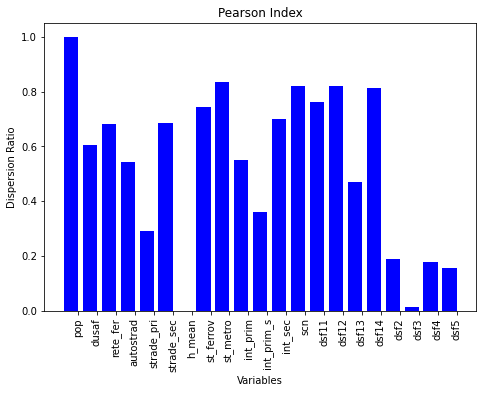

In [2]:
m.pearson(X, Y, labels

### Spearmanr correlation coefficient
The Spearman correlation coefficient is a measure of the monotonicity of the relationship between two datasets.
The algorithm evaluate the index for each feature variable. 



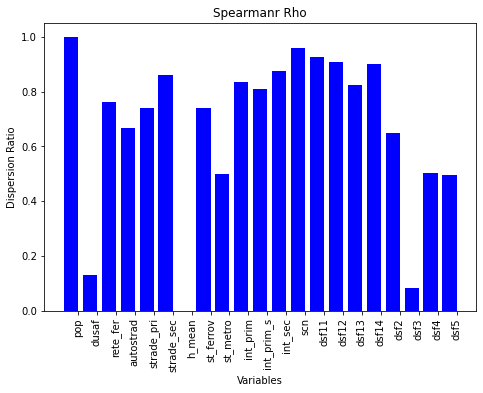

In [3]:
m.spearmanr(X, Y, labels)

### Kendall tau
As the Spearmanr correlation coefficient, is based on the ranks of data.
In most of the situations, the interpretations of Kendall’s tau and Spearman’s rank correlation coefficient are very similar and thus invariably lead to the same inferences.
The algorithm evaluate the index for each feature variable. 


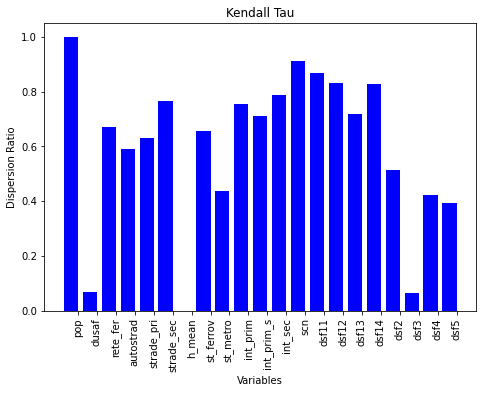

In [4]:
m.kendall(X, Y, labels)


### Chi-square test not allowed with no categorical input
A chi-square test is used to test events independence. In feature selection instead, we aim to select the features which are more highly dependent. Even if is more suitable for categorical input, computation is performed by casting features values as *Int values*. 

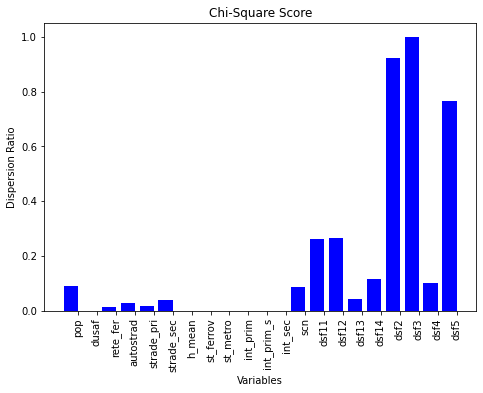

In [5]:
m.chi2_test(X_train, y_train, X_test, labels)

### F-Test
It's a statistical test used to compare model from X and Y and check if the difference is significant between them through regression. The algorithm evaluate the Fisher score for each feature variable. 

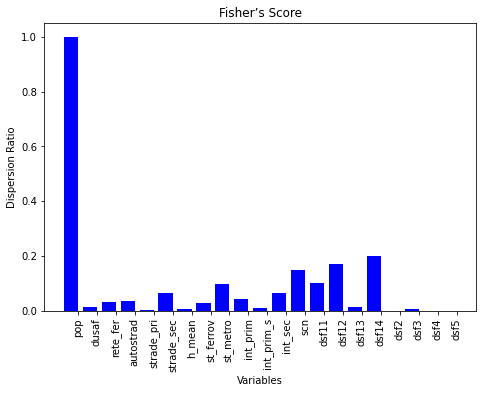

In [6]:
m.f_test(X_train, y_train, X_test, labels)

### Dispersion Ratio (Unsupervised)
It stands for the ratio between arithmetic mean the geometric mean. This is very usefull to check dispersion on data. Higher dispersion implies a higher value of this coefficent, thus a more relevant variable.

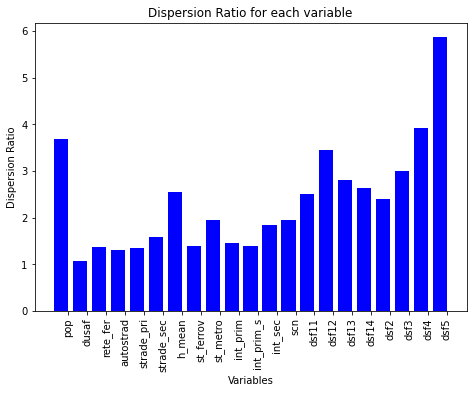

pop :  3.696779482494393
dusaf :  1.0777593900319926
rete_fer :  1.3740042429602914
autostrad :  1.2981032292376529
strade_pri :  1.3522066189992477
strade_sec :  1.5934719330784206
h_mean :  2.5542761802424105
st_ferrov :  1.3989649368289228
st_metro :  1.9504672397143112
int_prim :  1.4619346330873462
int_prim_s :  1.398323685565564
int_sec :  1.8495404313533361
scn :  1.9468508930447788
dsf11 :  2.5014404783036013
dsf12 :  3.455167254983982
dsf13 :  2.8160609798639293
dsf14 :  2.6346223440665315
dsf2 :  2.400532517748114
dsf3 :  3.0064792805664164
dsf4 :  3.920049367563896
dsf5 :  5.877780223438848


In [7]:
m.compute_dispersion_ratio(X, labels)

### Variance Threshold (Unsupervised)
It's an approach which aims to remove all features which variance doesn’t meet some threshold. Usually it removes all zero-variance features, so variables taht contains useless information.


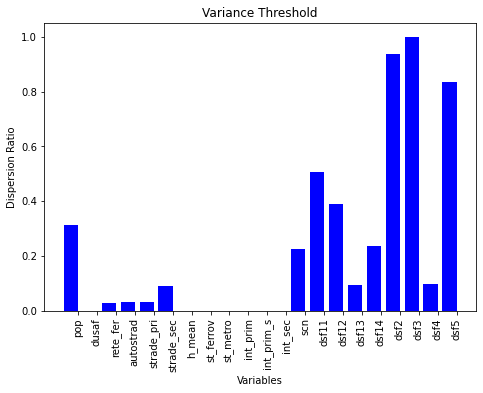

In [8]:
m.variance_threshold(X, labels)

## Wrapper Methods (and Embedded)
Wrapper methods, as the name suggests, wrap a machine learning model, with different subsets of input features: In this way the subsets are  evaluated following  the best model performance.
Embedded methods instead are characterised by the benefits of both the wrapper and filter methods, by including interactions of features but also having a reasonable computational cost.


### Exhaustive feature selection for regression analysis
This algorithm follow the exhaustive feature selection approach with brute-force evaluation of feature subsets; the best subset is selected by optimizing a specified metric given an arbitrary regressor or classifier. In this case a transformer is used to perform the Sequential Feature Selection. 
The final outputs are:
* Accuracy for the subset choosen;
* Indices of the choosen features;
* Corresponding names of the features choosen;



In [9]:
m.exhaustive_feature_selection(X_train, y_train, labels)

Features: 3000/7525IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 7525/7525

Best accuracy score: 0.95
Best subset (indices): (0, 4, 13, 17)
Best subset (corresponding names):
pop
strade_pri
dsf11
dsf2


### Random Forest importance
It uses a forest of trees to evaluate the importance of each features as outputs.

pop :  1.00000
dusaf :  0.00000
rete_fer :  0.00935
autostrad :  0.00100
strade_pri :  0.00259
strade_sec :  0.01070
h_mean :  0.00170
st_ferrov :  0.00019
st_metro :  0.08290
int_prim :  0.00176
int_prim_s :  0.00651
int_sec :  0.00311
scn :  0.08351
dsf11 :  0.00213
dsf12 :  0.00892
dsf13 :  0.00759
dsf14 :  0.11880
dsf2 :  0.00279
dsf3 :  0.00811
dsf4 :  0.00045
dsf5 :  0.00510


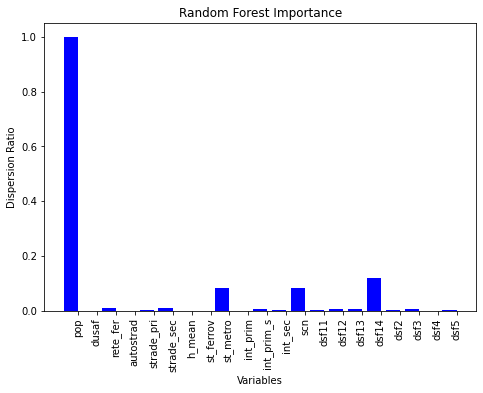

In [10]:
m.RF_importance(X_train, y_train, labels)

### Recursive Feature Selection
The goal of RFE is to select features by recursively considering smaller and smaller sets of features.
The final output for each variable will be:
* *Label*;
* A *boolean expressing* whetever is selected or not;
* *Ranking value* based on its score;

In [11]:
m.recursive_feature_selection(X_train, y_train.astype(int), labels, 5)

Label: pop, Selected=True, Rank: 1
Label: dusaf, Selected=False, Rank: 15
Label: rete_fer, Selected=False, Rank: 11
Label: autostrad, Selected=False, Rank: 16
Label: strade_pri, Selected=False, Rank: 5
Label: strade_sec, Selected=False, Rank: 9
Label: h_mean, Selected=False, Rank: 2
Label: st_ferrov, Selected=False, Rank: 14
Label: st_metro, Selected=False, Rank: 17
Label: int_prim, Selected=False, Rank: 12
Label: int_prim_s, Selected=False, Rank: 8
Label: int_sec, Selected=False, Rank: 10
Label: scn, Selected=True, Rank: 1
Label: dsf11, Selected=False, Rank: 3
Label: dsf12, Selected=False, Rank: 7
Label: dsf13, Selected=True, Rank: 1
Label: dsf14, Selected=False, Rank: 4
Label: dsf2, Selected=False, Rank: 6
Label: dsf3, Selected=True, Rank: 1
Label: dsf4, Selected=False, Rank: 13
Label: dsf5, Selected=True, Rank: 1


## Multiscale Geographically Weighted Regression
Due to the fact that this study is related to geographic and spatial data, each pieces of data is very sensitive to the geographic distance between them. So the use of mgwr methods could be innovative, since multivariate models are increasingly encountered in geographical research to estimate spatially varying relationships between a targets and its predictive variables.




In [12]:
m.mgwr(data, labels)

21
bw: 114.0


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

bw( intercept ): 106.0


bw( pop ):  16.0
bw( dusaf ):  158.0
bw( rete_fer ):  156.0
bw( autostrad ):  158.0
bw( strade_pri ):  97.0
bw( strade_sec ):  32.0
bw( h_mean ):  81.0
bw( st_ferrov ):  158.0
bw( st_metro ):  97.0
bw( int_prim ):  34.0
bw( int_prim_s ):  90.0
bw( int_sec ):  34.0
bw( scn ):  89.0
bw( dsf11 ):  32.0
bw( dsf12 ):  90.0
bw( dsf13 ):  158.0
bw( dsf14 ):  90.0
bw( dsf2 ):  158.0
bw( dsf3 ):  32.0
bw( dsf4 ):  158.0
bw( dsf5 ):  158.0




Inference:   0%|          | 0/1 [00:00<?, ?it/s]

aicc: 24154.239272007042
sigma2: 14445438453.35814
ENP(model): -2235262312.0035872
adj_alpha(model): -4.921122653448267e-10
critical_t(model): 6.323767292004148


ENP(intercept): 4962034766.316165
adj_alpha(intercept): 1.007651142217212e-11
critical_t(intercept): 6.938910276667541


ENP( pop ):  -6807887184.477655
adj_alpha( pop ):  -7.344422527153896e-12
critical_t( pop ):  6.986975717123481
ENP( dusaf ):  -1744899442.5653496
adj_alpha( dusaf ):  -2.865494639994271e-11
critical_t( dusaf ):  6.778111660215597
ENP( rete_fer ):  1106932272.4173877
adj_alpha( rete_fer ):  4.516988188519148e-11
critical_t( rete_fer ):  6.707103718520175
ENP( autostrad ):  63547867.04208328
adj_alpha( autostrad ):  7.868084693840082e-10
critical_t( autostrad ):  6.246159440390878
ENP( strade_pri ):  3958983002.2667155
adj_alpha( strade_pri ):  1.2629506105828822e-11
critical_t( strade_pri ):  6.904426500390543
ENP( strade_sec ):  -11461421290.567842
adj_alpha( strade_sec ):  -4.3624607046900385e-12
critical